In [20]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from scipy import stats
from scipy import stats, special
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection
from seaborn import pairplot, heatmap
import matplotlib.pyplot as plt

In [53]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

global rating, Aircraft, Class, Travel_type, Route, Date, comfort, staff, food, entertainment, wifi, ground_service, vfm, recommend

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    
    df = pd.DataFrame()

    for row in parsed_content.find_all("div", {"class": "body"}):
        data_dict = {'Comment': '', 
                     'Aircraft':'', 'Type Of Traveller':'', 'Seat Type':'', 'Route':'', 'Date Flown':'',
                     'Seat Comfort':0, 'Cabin Staff Service':0, 'Food & Beverages':0, 'Inflight Entertainment':0,
                     'Ground Service':0,'Wifi & Connectivity':0, 'Value For Money':0, 'Recommended':'', 'Rate':0}

        comment = {'Comment': row.find("div", {"class": "text_content"}).get_text()}
        rate = 0
        data_dict.update(comment)

        table = row.find_all('table')[0]

        for tr in  table.select('table.review-ratings tr'):            
            header=tr.find('td',class_='review-rating-header').text
            if tr.find('td',class_='review-value') :
                value=tr.find('td',class_='review-value').text
            else :
                value=len(tr.find('td',class_='review-rating-stars').select('.star.fill'))
                rate = rate + value
            data_dict.update({header:value})
        
        data_dict.update({"Rate":rate})
        df=df.append(data_dict,ignore_index=True)

    print(df)
        
 

Scraping page 1


ConnectionError: HTTPSConnectionPool(host='www.airlinequality.com', port=443): Max retries exceeded with url: /airline-reviews/british-airways/page/1/?sortby=post_date%3ADesc&pagesize=100 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000286E7ECAE80>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [ ]:
df.describe()

In [52]:
df.head()

,Aircraft,Cabin Staff Service,Comment,Date Flown,Food & Beverages,Ground Service,Inflight Entertainment,Recommended,Route,Seat Comfort,Seat Type,Type Of Traveller,Value For Money,Wifi & Connectivity
0,,1.0,✅ Trip Verified | London to Lyon. The flight ...,November 2018,0.0,1.0,0.0,0,London to Lyon,2.0,Economy Class,Solo Leisure,1.0,0.0
1,,5.0,✅ Trip Verified | London to Boston. I was sea...,November 2018,4.0,4.0,4.0,1,London to Boston,3.0,Economy Class,Business,5.0,1.0
2,A320,5.0,✅ Trip Verified | Stockholm to London. Standar...,November 2018,2.0,1.0,0.0,1,Stockholm to London,3.0,Business Class,Solo Leisure,3.0,0.0
3,,4.0,✅ Trip Verified | Amsterdam to London arrived...,November 2018,0.0,1.0,0.0,0,Amsterdam to London,4.0,Economy Class,Business,3.0,0.0
4,Boeing 777-200,2.0,✅ Trip Verified | Buenos Aires to London. We ...,November 2018,1.0,1.0,1.0,0,Buenos Aires to London,1.0,Economy Class,Couple Leisure,1.0,0.0


In [44]:
df.dtypes

Aircraft                   object
Cabin Staff Service       float64
Comment                    object
Date Flown                 object
Food & Beverages          float64
Ground Service            float64
Inflight Entertainment    float64
Rate                      float64
Recommended                object
Route                      object
Seat Comfort              float64
Seat Type                  object
Type Of Traveller          object
Value For Money           float64
Wifi & Connectivity       float64
dtype: object

In [45]:
X = df["Food & Beverages"].values.reshape(-1, 1)
y = df["Inflight Entertainment"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (100, 1) (100, 1)


Text(0, 0.5, 'Inflight Entertainment')

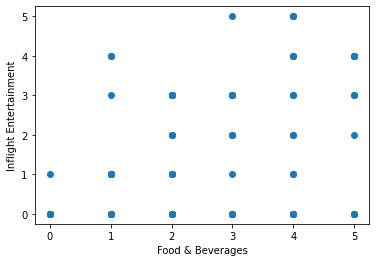

In [46]:
plt.scatter(X, y)
plt.xlabel("Food & Beverages")
plt.ylabel("Inflight Entertainment")

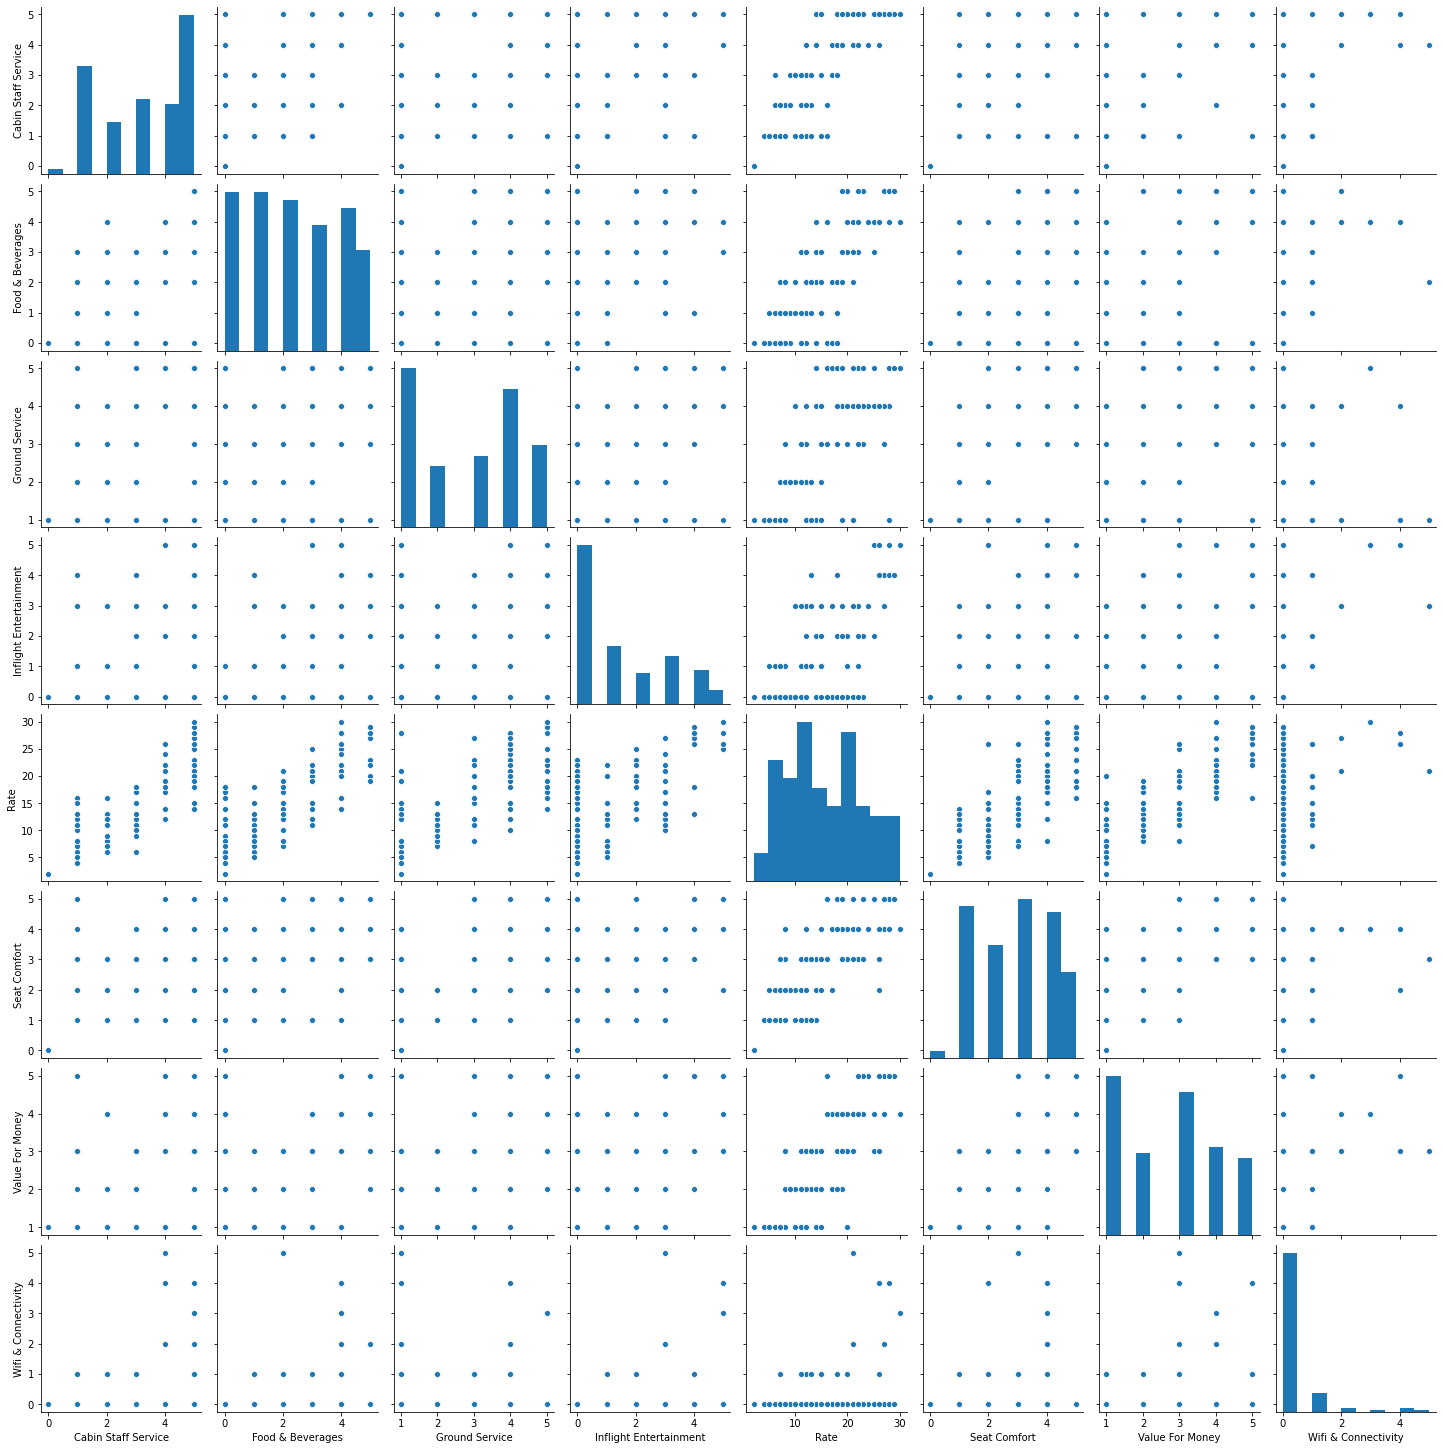

In [49]:
pairplot(df);

In [51]:
#an['Lays Eggs'] = an['Lays Eggs'].replace({'no': 0, 'yes': 1})
#df = df1
#df1['Recommended'] = df1['Recommended'].replace({'no': 0, 'yes': 1})
df.head()

,Aircraft,Cabin Staff Service,Comment,Date Flown,Food & Beverages,Ground Service,Inflight Entertainment,Recommended,Route,Seat Comfort,Seat Type,Type Of Traveller,Value For Money,Wifi & Connectivity
0,,1.0,✅ Trip Verified | London to Lyon. The flight ...,November 2018,0.0,1.0,0.0,0,London to Lyon,2.0,Economy Class,Solo Leisure,1.0,0.0
1,,5.0,✅ Trip Verified | London to Boston. I was sea...,November 2018,4.0,4.0,4.0,1,London to Boston,3.0,Economy Class,Business,5.0,1.0
2,A320,5.0,✅ Trip Verified | Stockholm to London. Standar...,November 2018,2.0,1.0,0.0,1,Stockholm to London,3.0,Business Class,Solo Leisure,3.0,0.0
3,,4.0,✅ Trip Verified | Amsterdam to London arrived...,November 2018,0.0,1.0,0.0,0,Amsterdam to London,4.0,Economy Class,Business,3.0,0.0
4,Boeing 777-200,2.0,✅ Trip Verified | Buenos Aires to London. We ...,November 2018,1.0,1.0,1.0,0,Buenos Aires to London,1.0,Economy Class,Couple Leisure,1.0,0.0


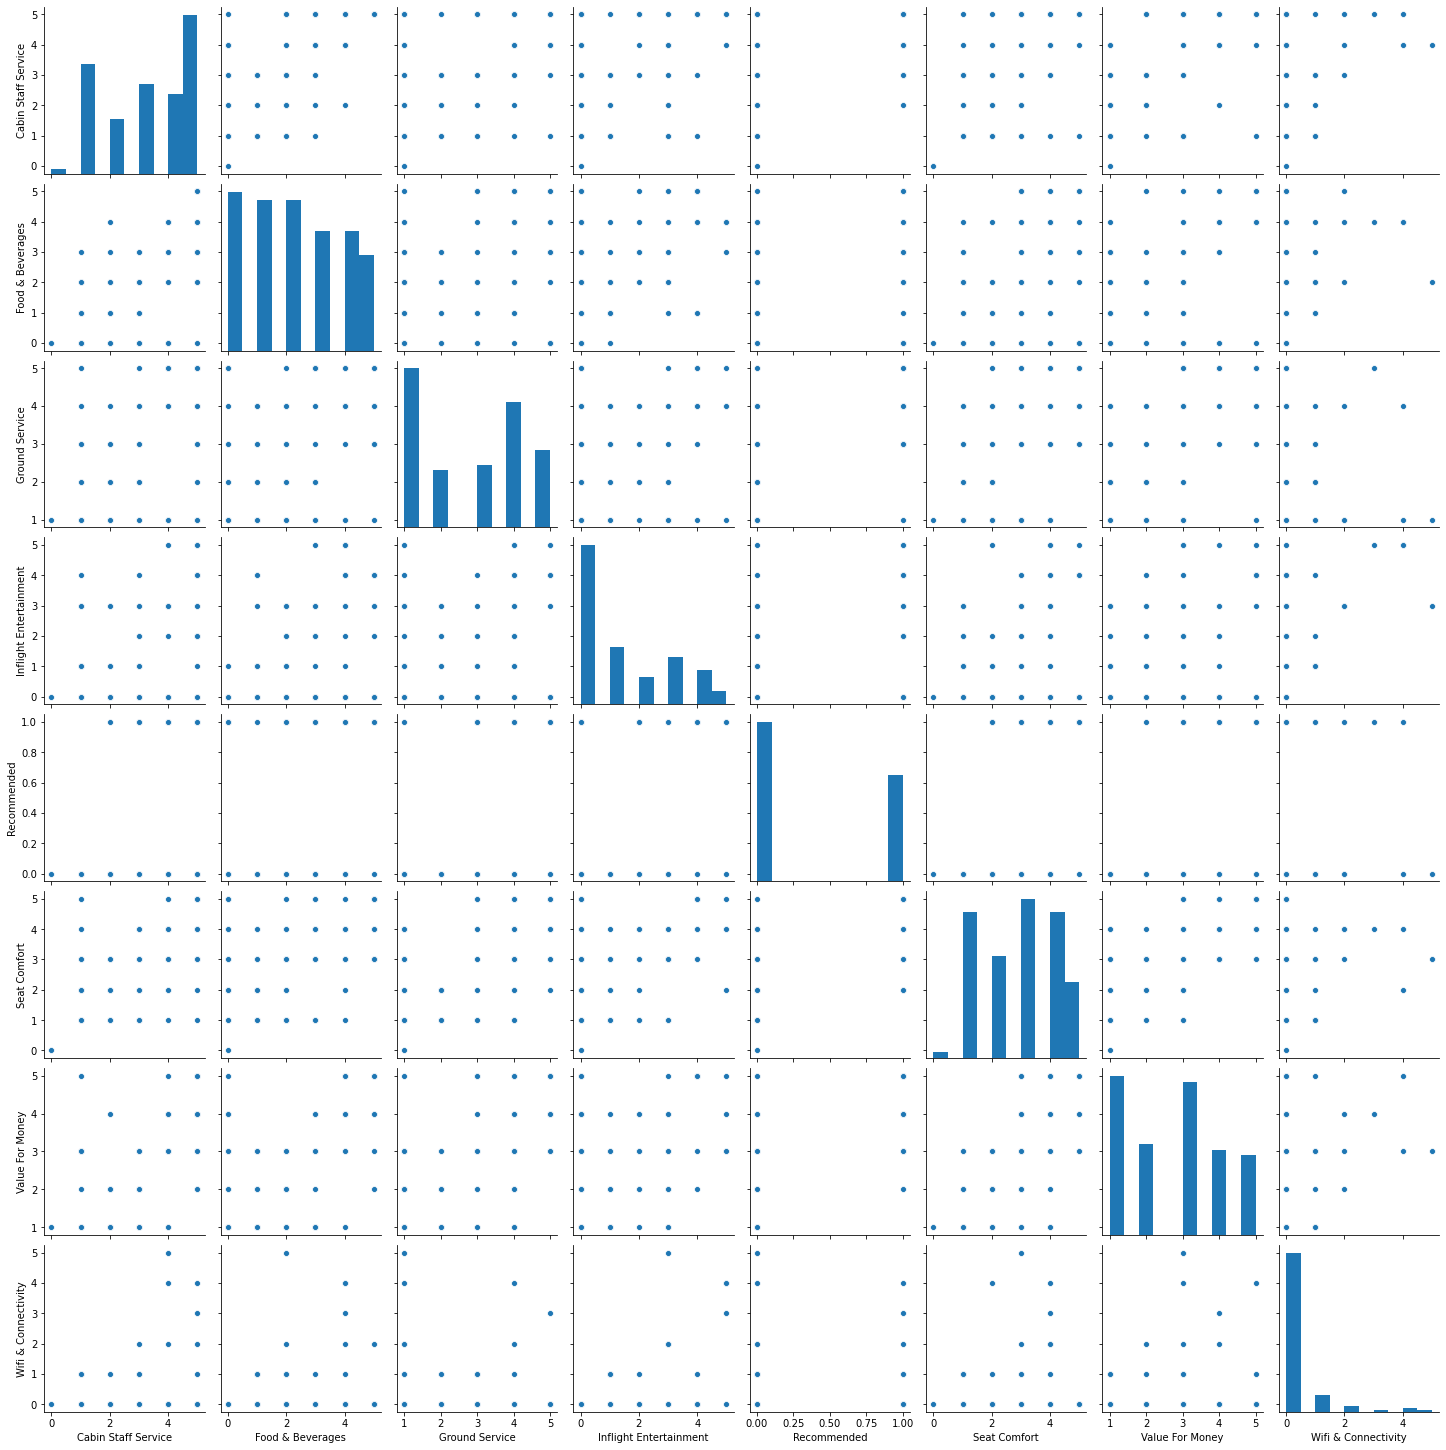

In [34]:
pairplot(df);

In [25]:
plt.figure()
plt.bar(customer_df['INDUSTRY'].value_counts().index, customer_df['INDUSTRY'].value_counts().values)
plt.xticks(rotation=45)
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>